In [227]:
from cab420_a1c_q1_utils import *

import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture


In [228]:
movies, ratings = load_data('.')
print(movies.shape)
print(ratings.shape)
movies.head()

(9742, 3)
(100836, 4)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [229]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Prepare Data

In [230]:
average_rating_per_film = get_average_rating_per_film(ratings)
movies_with_genres, genres = expand_genres(movies)
user_movies = movies_per_user(ratings, movies_with_genres, genres)
user_genre_ratings = average_per_user(user_movies)



Deal with NaN, NaN indicates that the user has not watched any movies from this genre. Replace NaN with 0.

In [231]:
user_genre_ratings_without_NaN = user_genre_ratings.fillna(0)
user_genre_ratings_without_NaN.head()

,War,Thriller,Documentary,Drama,Animation,Crime,(no genres listed),Adventure,Action,Sci-Fi,Fantasy,Film-Noir,Children,Comedy,Romance,Horror,Western,Mystery,IMAX,Musical
userId,,,,,,,,,,,,,,,,,,,,
1,4.500000,4.145455,0.000000,4.529412,4.689655,4.355556,0.0,4.388235,4.322222,4.225000,4.297872,5.0,4.547619,4.277108,4.307692,3.470588,4.285714,4.166667,0.000000,4.681818
2,4.500000,3.700000,4.333333,3.882353,0.000000,3.800000,0.0,4.166667,3.954545,3.875000,0.000000,0.0,0.000000,4.000000,4.500000,3.000000,3.500000,4.000000,3.750000,0.000000
3,0.500000,4.142857,0.000000,0.750000,0.500000,0.500000,0.0,2.727273,3.571429,4.200000,3.375000,0.0,0.500000,1.000000,0.500000,4.687500,0.000000,5.000000,0.000000,0.500000
4,3.571429,3.552632,4.000000,3.483333,4.000000,3.814815,0.0,3.655172,3.320000,2.833333,3.684211,4.0,3.800000,3.509615,3.379310,4.250000,3.800000,3.478261,3.000000,4.000000
5,3.333333,3.555556,0.000000,3.800000,4.333333,3.833333,0.0,3.250000,3.111111,2.500000,4.142857,0.0,4.111111,3.466667,3.090909,3.000000,3.000000,4.000000,3.666667,4.400000


In [232]:
train = user_genre_ratings_without_NaN


Remove the (no genres listed) column

In [233]:
train = train.drop("(no genres listed)", 1)
print(train.shape)
train.head()

(610, 19)


,War,Thriller,Documentary,Drama,Animation,Crime,Adventure,Action,Sci-Fi,Fantasy,Film-Noir,Children,Comedy,Romance,Horror,Western,Mystery,IMAX,Musical
userId,,,,,,,,,,,,,,,,,,,
1,4.500000,4.145455,0.000000,4.529412,4.689655,4.355556,4.388235,4.322222,4.225000,4.297872,5.0,4.547619,4.277108,4.307692,3.470588,4.285714,4.166667,0.000000,4.681818
2,4.500000,3.700000,4.333333,3.882353,0.000000,3.800000,4.166667,3.954545,3.875000,0.000000,0.0,0.000000,4.000000,4.500000,3.000000,3.500000,4.000000,3.750000,0.000000
3,0.500000,4.142857,0.000000,0.750000,0.500000,0.500000,2.727273,3.571429,4.200000,3.375000,0.0,0.500000,1.000000,0.500000,4.687500,0.000000,5.000000,0.000000,0.500000
4,3.571429,3.552632,4.000000,3.483333,4.000000,3.814815,3.655172,3.320000,2.833333,3.684211,4.0,3.800000,3.509615,3.379310,4.250000,3.800000,3.478261,3.000000,4.000000
5,3.333333,3.555556,0.000000,3.800000,4.333333,3.833333,3.250000,3.111111,2.500000,4.142857,0.0,4.111111,3.466667,3.090909,3.000000,3.000000,4.000000,3.666667,4.400000


### t-SNE Visualization

/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


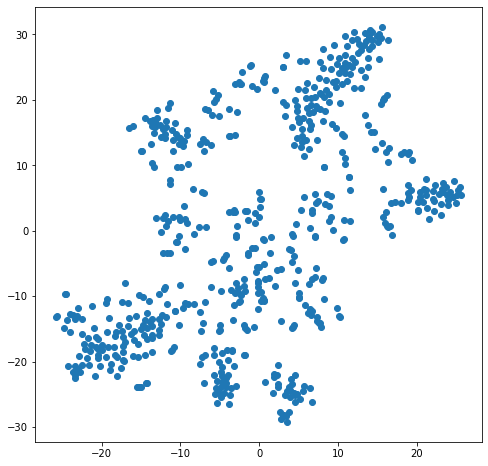

In [234]:
tsne_embeddings = TSNE(random_state=42).fit_transform(train)
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1]);

### Boxplot of the input data

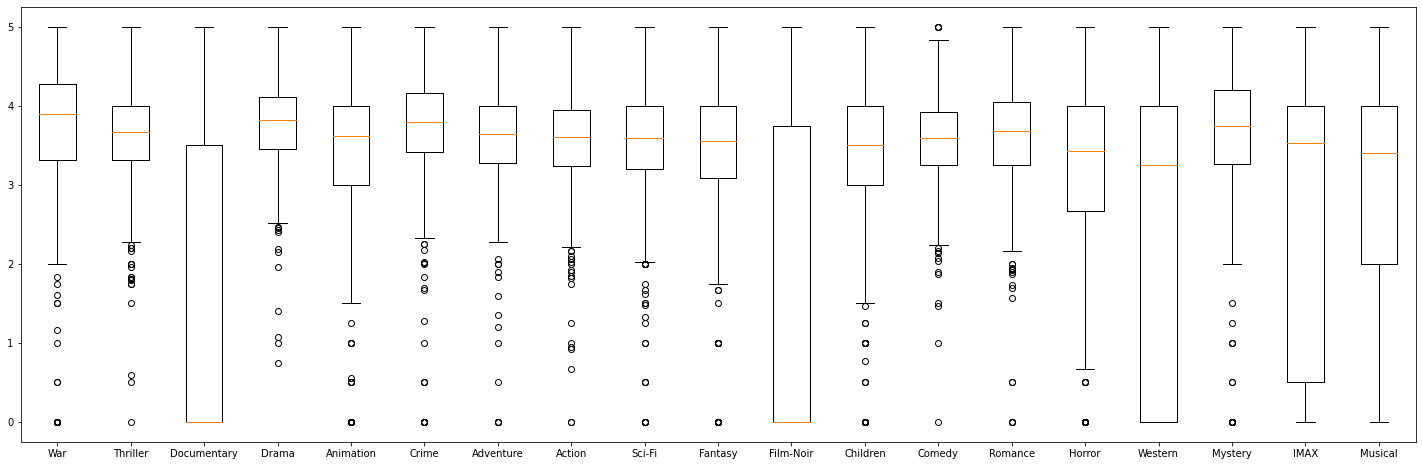

In [235]:
fig = plt.figure(figsize=[25,8])
ax = fig.add_subplot(1,1,1)
ax.boxplot(train, labels=train.columns);

## Selection of K

Use BIC to select best K

In [236]:
train.head()

,War,Thriller,Documentary,Drama,Animation,Crime,Adventure,Action,Sci-Fi,Fantasy,Film-Noir,Children,Comedy,Romance,Horror,Western,Mystery,IMAX,Musical
userId,,,,,,,,,,,,,,,,,,,
1,4.500000,4.145455,0.000000,4.529412,4.689655,4.355556,4.388235,4.322222,4.225000,4.297872,5.0,4.547619,4.277108,4.307692,3.470588,4.285714,4.166667,0.000000,4.681818
2,4.500000,3.700000,4.333333,3.882353,0.000000,3.800000,4.166667,3.954545,3.875000,0.000000,0.0,0.000000,4.000000,4.500000,3.000000,3.500000,4.000000,3.750000,0.000000
3,0.500000,4.142857,0.000000,0.750000,0.500000,0.500000,2.727273,3.571429,4.200000,3.375000,0.0,0.500000,1.000000,0.500000,4.687500,0.000000,5.000000,0.000000,0.500000
4,3.571429,3.552632,4.000000,3.483333,4.000000,3.814815,3.655172,3.320000,2.833333,3.684211,4.0,3.800000,3.509615,3.379310,4.250000,3.800000,3.478261,3.000000,4.000000
5,3.333333,3.555556,0.000000,3.800000,4.333333,3.833333,3.250000,3.111111,2.500000,4.142857,0.0,4.111111,3.466667,3.090909,3.000000,3.000000,4.000000,3.666667,4.400000


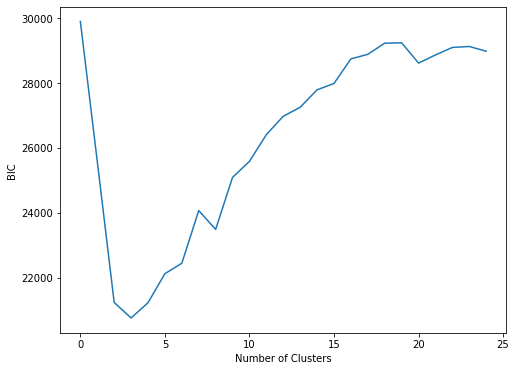

In [237]:
num_iterations = 10
bics = []
for i in range(25):
    b = 0
    for r in range(num_iterations):
        gmm = GaussianMixture(n_components=i+1, random_state=r)
        gmm.fit(train)
        b += gmm.bic(train)
    bics.append(b / num_iterations)

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(1,1,1)
ax.plot(bics)
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("BIC");

The best number of clusters is 3

In [238]:
K = np.argmin(bics)
print(K)

3


## Analyze the GMM model

In [239]:
def do_gmm_analysis(K, random_state, train):

    # train the GMM
    gmm = GaussianMixture(n_components=K, random_state=random_state).fit(train)

    # plot the component means
    x_labels = train.columns
    fig = plt.figure(figsize=[25,15])
    for i in range(K):
        ax = fig.add_subplot(K,1,i+1)
        ax.bar(x_labels, gmm.means_[i,:])
        ax.set_title(f"Cluster {i+1}")
    
    # TSNE plot of the data
    fig = plt.figure(figsize=[20,20])
    ax = fig.add_subplot(1,1,1)
    tsne_embeddings = TSNE(random_state=4).fit_transform(np.vstack([train, gmm.means_]))
    train_labels = gmm.predict(train)
    ax.scatter(tsne_embeddings[:-K,0], tsne_embeddings[:-K,1], c=train_labels)

    # add component means to the scatter plot
    ax.scatter(tsne_embeddings[-K:,0], tsne_embeddings[-K:,1], s=200, marker="x")

    import numpy
    def normalise_histogram(hist):
        return hist / numpy.sum(hist)

    def histogram_intersection(hist1, hist2):
        total = 0
        for i, j in zip(hist1, hist2):
            total += min(i, j)
        return total

    bins = list(range(K+1))
    normalise_histograms = {}
    for c_id in range(K):
        c, _ = numpy.histogram(gmm.means_[c_id,:], bins)
        c = normalise_histogram(c)
        normalise_histograms[c_id] = c

    for i in range(K):
        for j in range(i, K):
            print(f"Cluster {i+1} vs Cluster {j+1}: {histogram_intersection(normalise_histograms[i],normalise_histograms[j])}")


    return gmm

/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Cluster 1 vs Cluster 1: 1.0
Cluster 1 vs Cluster 2: 0.5
Cluster 1 vs Cluster 3: 0.6666666666666666
Cluster 2 vs Cluster 2: 1.0
Cluster 2 vs Cluster 3: 0.5
Cluster 3 vs Cluster 3: 1.0


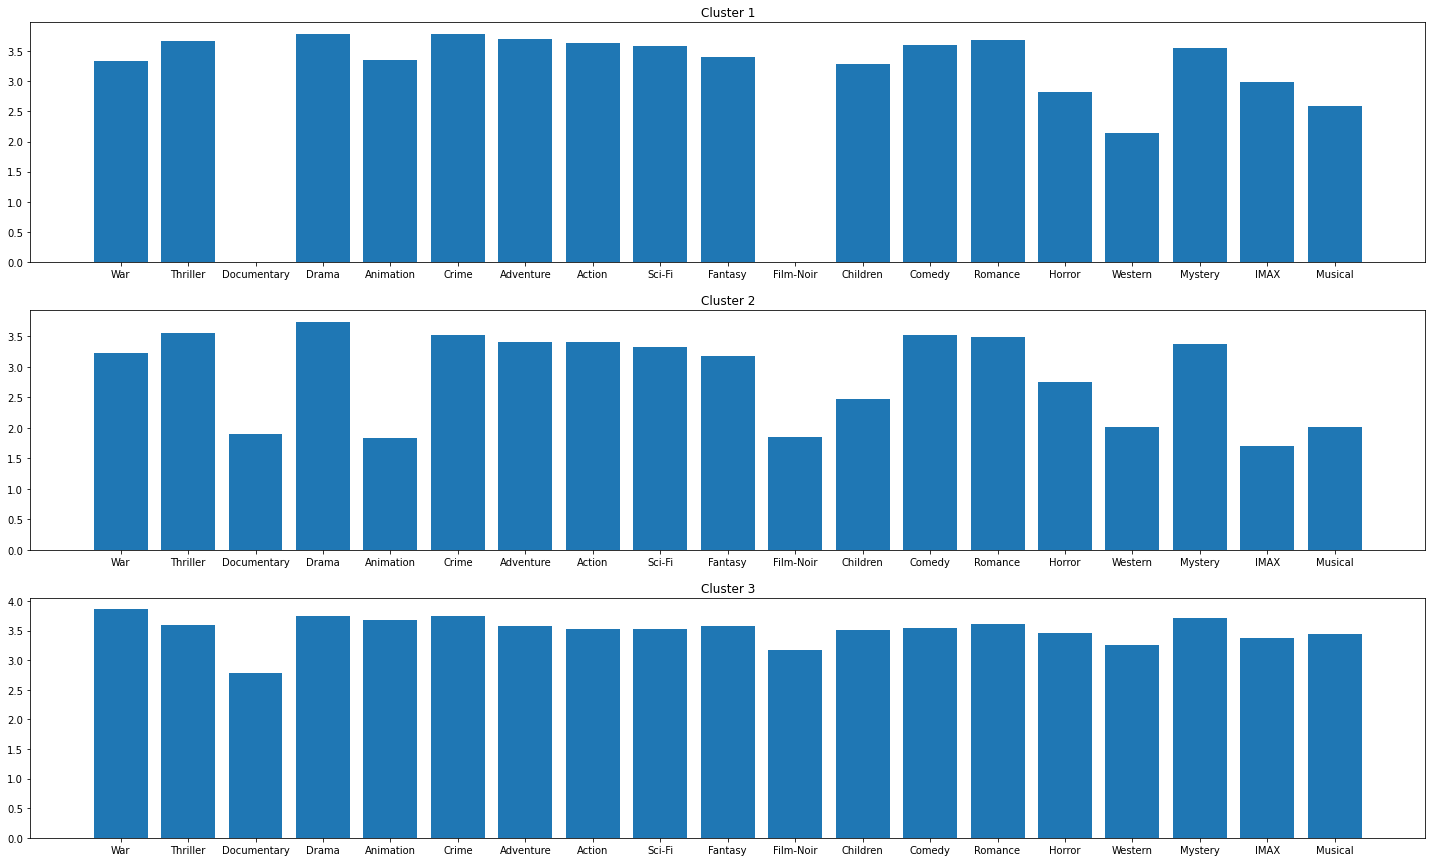

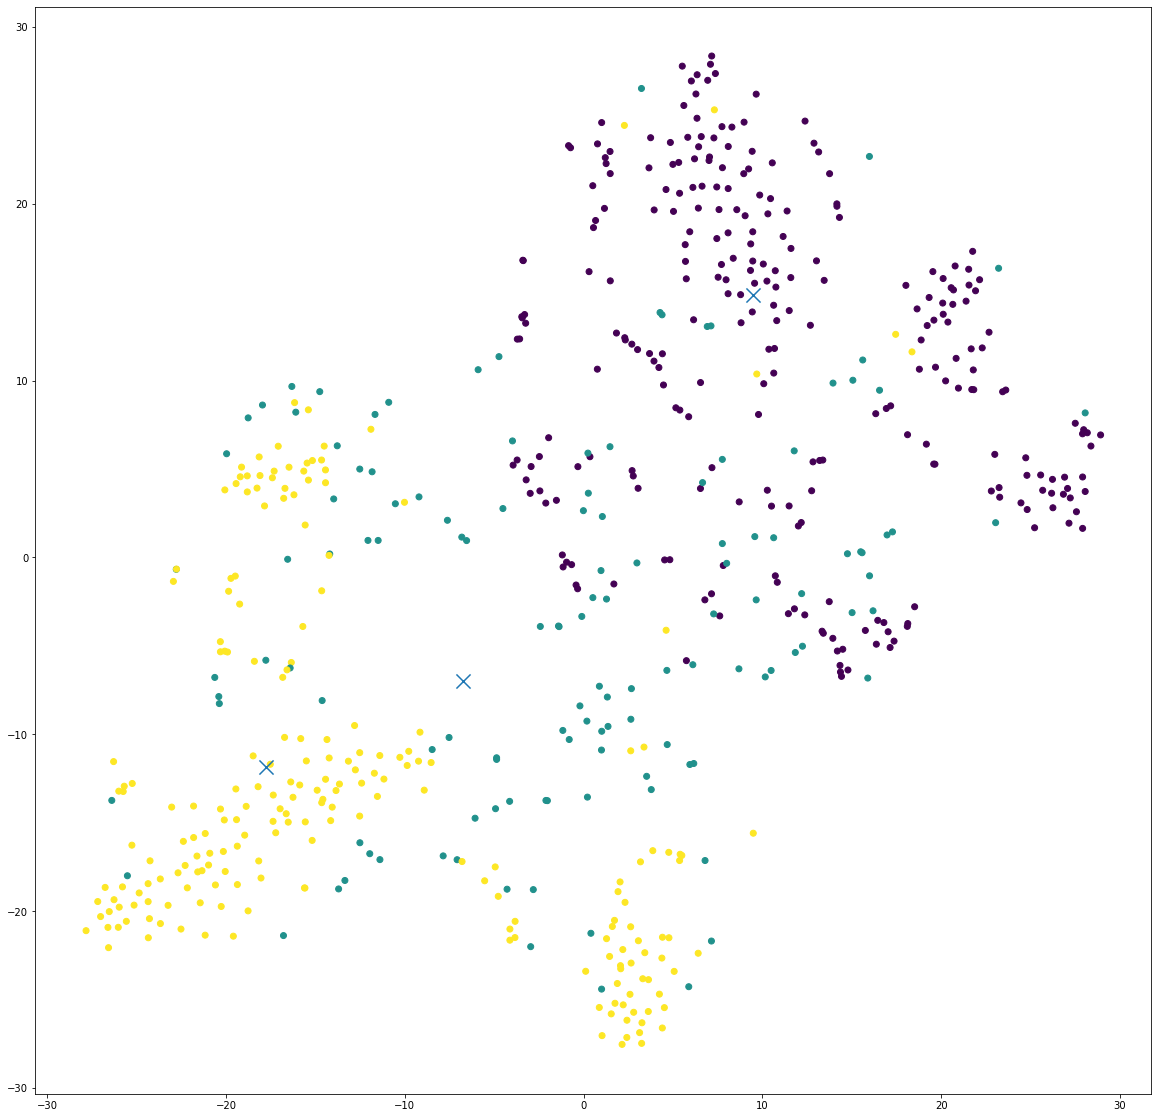

In [240]:
gmm = do_gmm_analysis(K,4,train)

Compute histogram intersection

In [241]:
import numpy
def normalise_histogram(hist):
    return hist / numpy.sum(hist)

def histogram_intersection(hist1, hist2):
    total = 0
    for i, j in zip(hist1, hist2):
        total += min(i, j)
    return total

bins = list(range(K+1))
labels = gmm.predict(train)
normalise_histograms = {}
for c_id in range(K):
    c, _ = numpy.histogram(gmm.means_[c_id,:], bins)
    c = normalise_histogram(c)
    normalise_histograms[c_id] = c

for c_id in range(1,K):
    print(f"Cluster {0} vs Cluster {c_id}: {histogram_intersection(normalise_histograms[0],normalise_histograms[c_id])}")


Cluster 0 vs Cluster 1: 0.5
Cluster 0 vs Cluster 2: 0.6666666666666666


In [243]:
def get_user_by_id(user_id):
    return train.iloc[[user_id-1]]

def get_movies_watched_by_cluster(user_ids):
    '''Get all the movies watched by this user. And sort the movies by descending order'''
    return ratings.loc[ratings["userId"].isin(user_ids)]["movieId"].value_counts().sort_values(ascending=False)

def get_movies_watched_by_user(user_id):
    return get_movies_watched_by_cluster([user_id])
def get_clusters():
    """clusters[0] is the first cluster and it contains the users assigned to this cluster."""
    clusters = []
    user_cluster = np.argmax( gmm.predict_proba(train), axis=1)
    for i in range(K):
        clusters.append(np.where( user_cluster == i)[0]+1)

    return clusters
def get_cluster_id_by_user_id(user_id):
    return np.argmax(gmm.predict_proba(get_user_by_id(user_id)))
def get_cluster_id_by_user(user):
    return np.argmax(gmm.predict_proba(user))

def get_recommendations_by_user(user,watched_movies=[] ,num_movies=10):
    cluster_id = get_cluster_id_by_user(user)
    clusters = get_clusters()

    popular_movies = get_movies_watched_by_cluster(clusters[cluster_id])
    recommended_movies = []
    

    count = 0
    i = 0
    while (count < num_movies) and i < len(popular_movies.index):
        pop_movie = popular_movies.index[i]
        if pop_movie in watched_movies:
            i+=1
            continue
        recommended_movies.append(pop_movie)
        count+=1
        i+=1


    return recommended_movies

def get_recommendations(user_id, num_movies=10):
    # zero-indexing
    # find the id of the cluster that the user belongs to
    cluster_id = get_cluster_id_by_user_id(user_id)
    clusters = get_clusters()

    

    # find popular movies within this cluster
    popular_movies = get_movies_watched_by_cluster(clusters[cluster_id])
    watched_movies = get_movies_watched_by_user(user_id)
    # print(popular_movies.shape)
    # print(watched_movies.shape)

    # print(popular_movies.index)
    # print(watched_movies.index)
    recommended_movies = []
    

    count = 0
    i = 0
    while (count < num_movies) and i < len(popular_movies.index):
        pop_movie = popular_movies.index[i]
        if pop_movie in watched_movies.index:
            i+=1
            continue
        recommended_movies.append(pop_movie)
        count+=1
        i+=1


    return recommended_movies

    
get_recommendations(4)


[356, 318, 1210, 4993, 480, 1, 50, 858, 1270, 2028]

Obtain recommendations

In [244]:
user_ids = [4, 42, 314]
recommended_movies = {}
for user_id in user_ids:
    recommended_movies[user_id] = get_recommendations(user_id, 5)
recommended_movies

{4: [356, 318, 1210, 4993, 480],
 42: [1198, 4993, 480, 2858, 1],
 314: [2571, 231, 4993, 292, 454]}

In [245]:
for user_id in user_ids:
    c = get_cluster_id_by_user_id(user_id)
    print(f"user:{user_id} belongs to cluster:{c}")

user:4 belongs to cluster:2
user:42 belongs to cluster:2
user:314 belongs to cluster:0


Plot the users

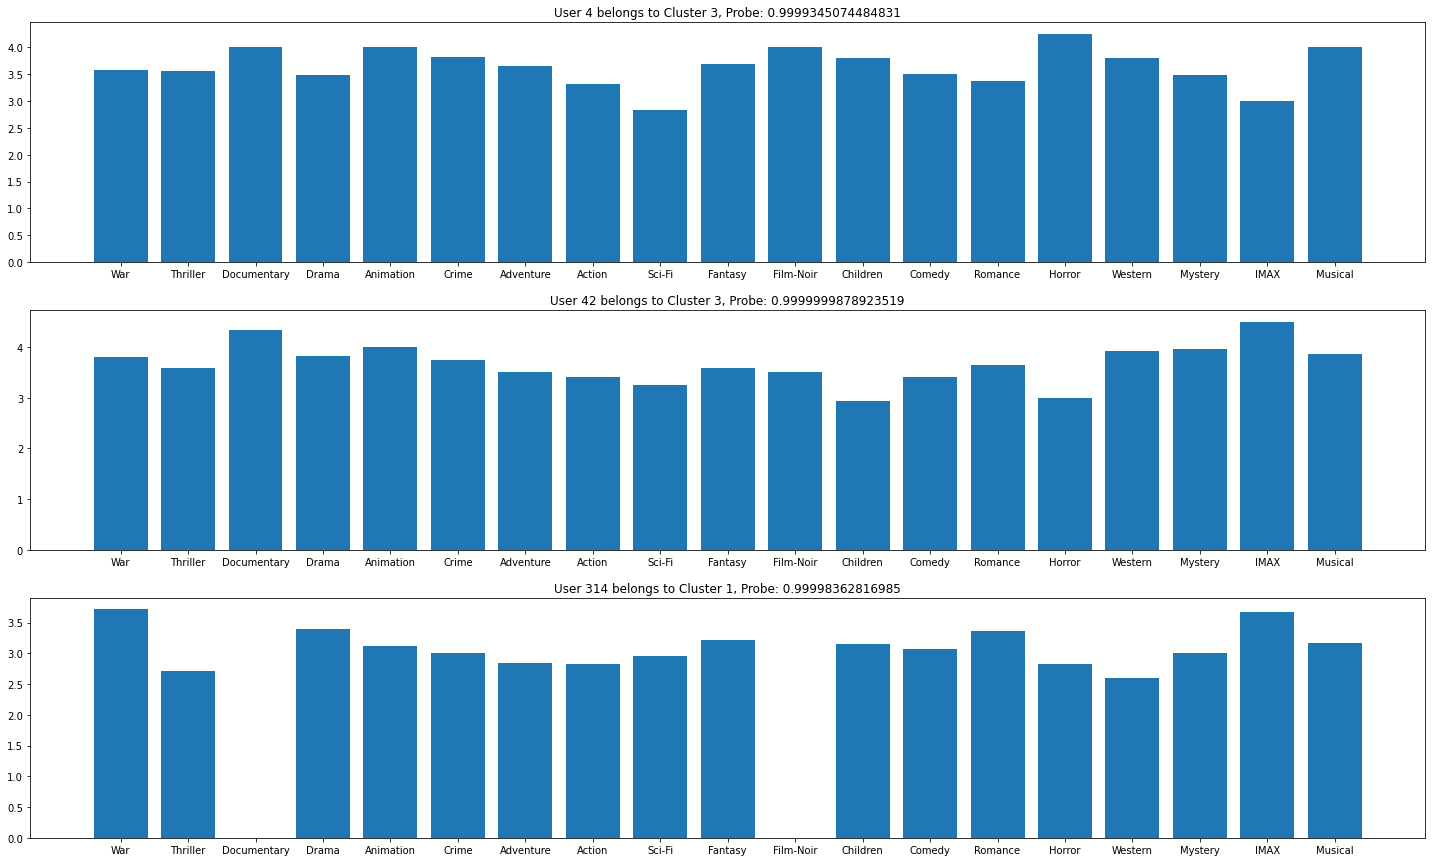

In [280]:
def plot_users(user_ids):
    x_labels = train.columns
    fig = plt.figure(figsize=[25,15])
    count = 0
    for i in user_ids:
        c = get_cluster_id_by_user_id(i)
        probe = gmm.predict_proba(get_user_by_id(i)).max()
        ax = fig.add_subplot(len(user_ids),1, count+1)
        ax.bar(x_labels, get_user_by_id(i).iloc[0])
        ax.set_title(f"User {i} belongs to Cluster {c+1}, Probe: {probe}")
        count += 1
plot_users(user_ids)

/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/cab420-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


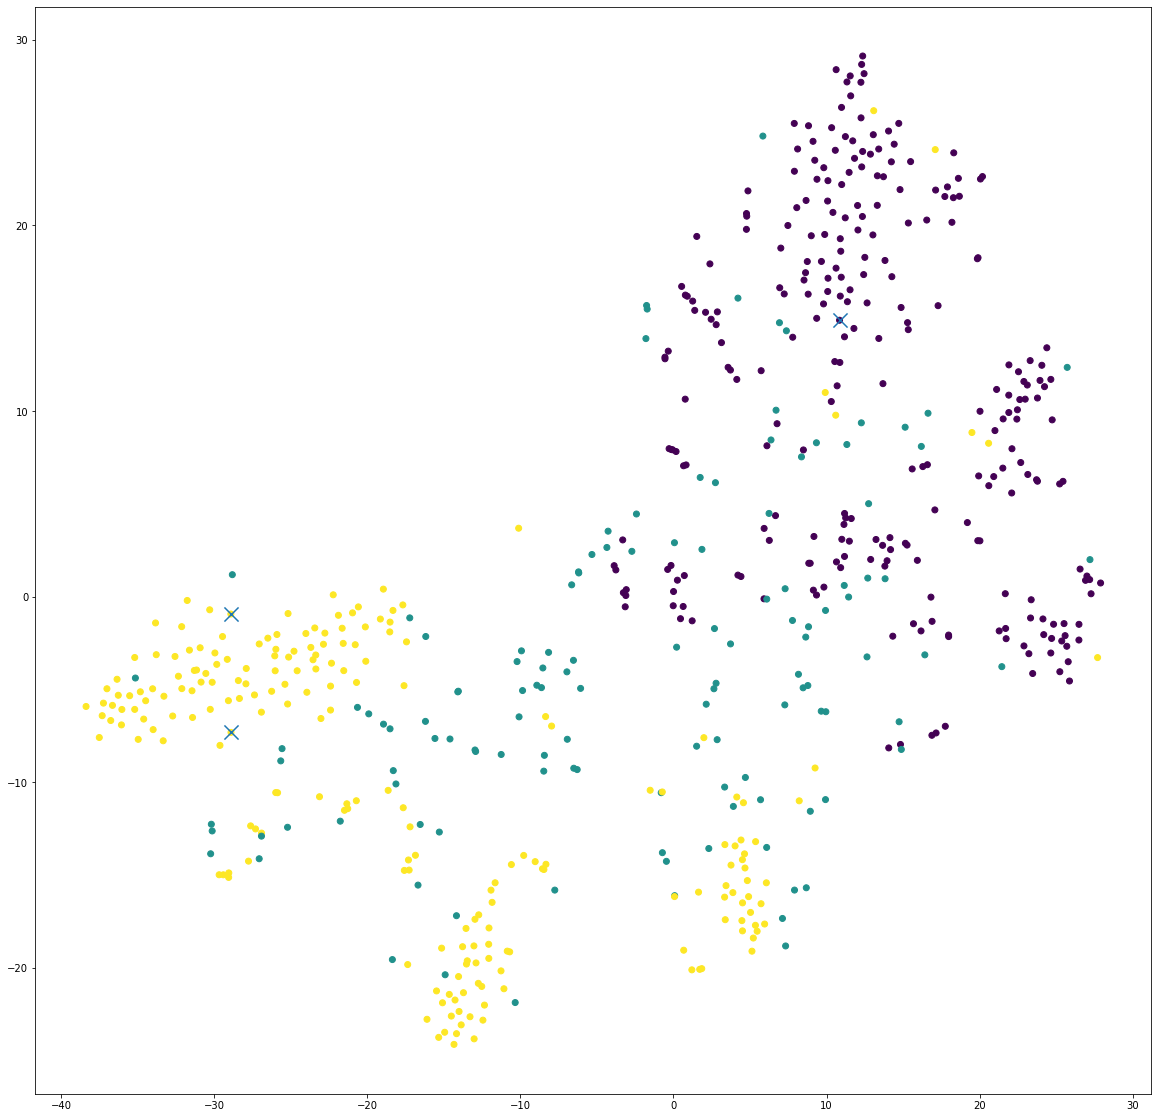

In [247]:
def do_recommendation_analysis(user_ids):
    num_users = len(user_ids)
    users = []
    for user_id in user_ids:
        users.append(get_user_by_id(user_id).to_numpy())
    users= np.array(users)
    users = users.reshape(users.shape[0],-1)
    # TSNE plot of the data
    fig = plt.figure(figsize=[20,20])
    ax = fig.add_subplot(1,1,1)
    tsne_embeddings = TSNE(random_state=4).fit_transform(np.vstack([train, users]))
    train_labels = gmm.predict(train)
    ax.scatter(tsne_embeddings[:-num_users,0], tsne_embeddings[:-num_users,1], c=train_labels)

    # add component means to the scatter plot
    ax.scatter(tsne_embeddings[-num_users:,0], tsne_embeddings[-num_users:,1], s=200, marker="x")
do_recommendation_analysis(user_ids)

In [265]:
import random
tester_ids = random.sample(ratings["userId"].unique().tolist(), k=100)
# remove some movies
movies_to_remove = 50
movies_removed = {}
movies_watched = {}
temp = []
for tester_id in tester_ids:
    tester_ratings = ratings[ratings["userId"].isin(tester_ids)]
    movies_removed[tester_id] = ratings[ratings["userId"]==tester_id].sort_values(by=["rating"],ascending=False).iloc[:movies_to_remove,:]["movieId"].to_list()
    watched = ratings[ratings["userId"]==tester_id].sort_values(by=["rating"],ascending=False).iloc[movies_to_remove:,:]
    movies_watched[tester_id] = watched
    temp.append(watched)

tester_ratings = pandas.concat(temp)

tester_movies = movies_per_user(tester_ratings, movies_with_genres, genres)
tester_genre_ratings = average_per_user(tester_movies)
testers = tester_genre_ratings.fillna(0).drop("(no genres listed)", 1)


In [268]:
num = 0
acc = 0
accuracy_dict = {}
print(f"Movies removed: {movies_to_remove}")
num_recommendations = 20
for tester in tester_ids:
    try:
        m = get_recommendations_by_user(testers.loc[[tester]], movies_watched[tester],num_movies=num_recommendations)
        a = m
        b = movies_removed[tester]
        cluster = get_cluster_id_by_user(testers.loc[[tester]])
        intersection = list(set(a) & set(b))
        accuracy = len(intersection)/num_recommendations
        accuracy_dict[tester] = accuracy
        print(f"Tester Id: {tester}, belongs to cluster: {cluster+1}")
        print(f"Tester Id: {tester}, recommended movies: {m}")
        print(f"Tester Id: {tester}, movies removed: {b}")
        print(f"Intersection ({len(intersection)}): {intersection}")
        print(f"accuracy: {accuracy:.2%}")
        print()
        acc += accuracy
        num+=1
    except:
        continue

print(acc/num)


Movies removed: 50
Tester Id: 266, belongs to cluster: 2
Tester Id: 266, recommended movies: [318, 2571, 356, 296, 593, 2858, 527, 260, 2959, 110, 858, 1196, 50, 608, 1198, 2028, 589, 111, 480, 1193]
Tester Id: 266, movies removed: [1394, 924, 1466, 1298, 1297, 1291, 1288, 1285, 1266, 1261, 1222, 1220, 1213, 1208, 1206, 1200, 1199, 1198, 1196, 1136, 1090, 1089, 1080, 1610, 1663, 1732, 2712, 3108, 3060, 3052, 2968, 2959, 2947, 2916, 2890, 2716, 2702, 1884, 2700, 2683, 2599, 2571, 2300, 2278, 2195, 2194, 2064, 1079, 3265, 608]
Intersection (5): [608, 2571, 1196, 1198, 2959]
accuracy: 25.00%

Tester Id: 425, belongs to cluster: 3
Tester Id: 425, recommended movies: [356, 2571, 296, 260, 318, 593, 1196, 2959, 1210, 1198, 4993, 480, 2858, 1, 2762, 47, 50, 858, 1270, 2028]
Tester Id: 425, movies removed: [778, 356, 318, 293, 1061, 30749, 2600, 6016, 1527, 2447, 1216, 3578, 5952, 4993, 3897, 2959, 3275, 79132, 4033, 50, 47, 159, 1961, 6300, 1625, 1198, 1645, 8360, 2502, 1653, 1079, 6979, 7438

Text(0.5, 1.0, 'Recommendation Accuracy (removed 50 movies)')

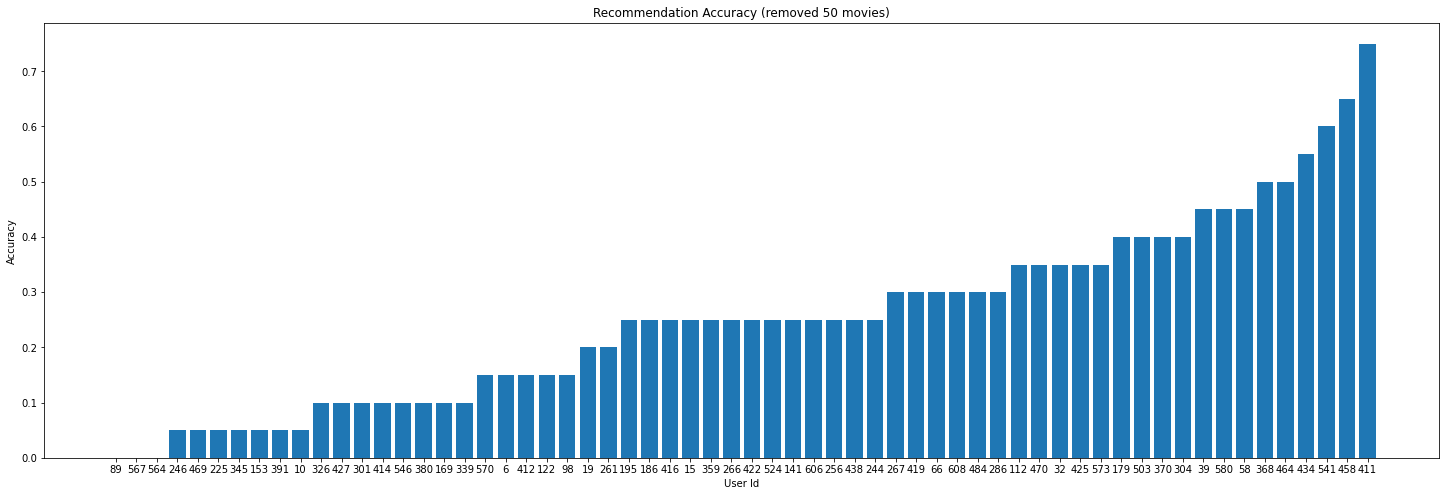

In [279]:
accuracy_dict
df = pandas.DataFrame(
   dict(
      tester_id=map(lambda x:f"{x}",accuracy_dict.keys()),
      accuracy=accuracy_dict.values()
   )
)

df = df.sort_values(by=["accuracy"])

fig = plt.figure(figsize=[25,8])
ax = fig.add_subplot(1,1,1)
ax.bar(x=df["tester_id"], height=df["accuracy"])
ax.set_xlabel("User Id")
ax.set_ylabel("Accuracy")
ax.set_title("Recommendation Accuracy (removed 50 movies)")

Examine users with accuracy 0

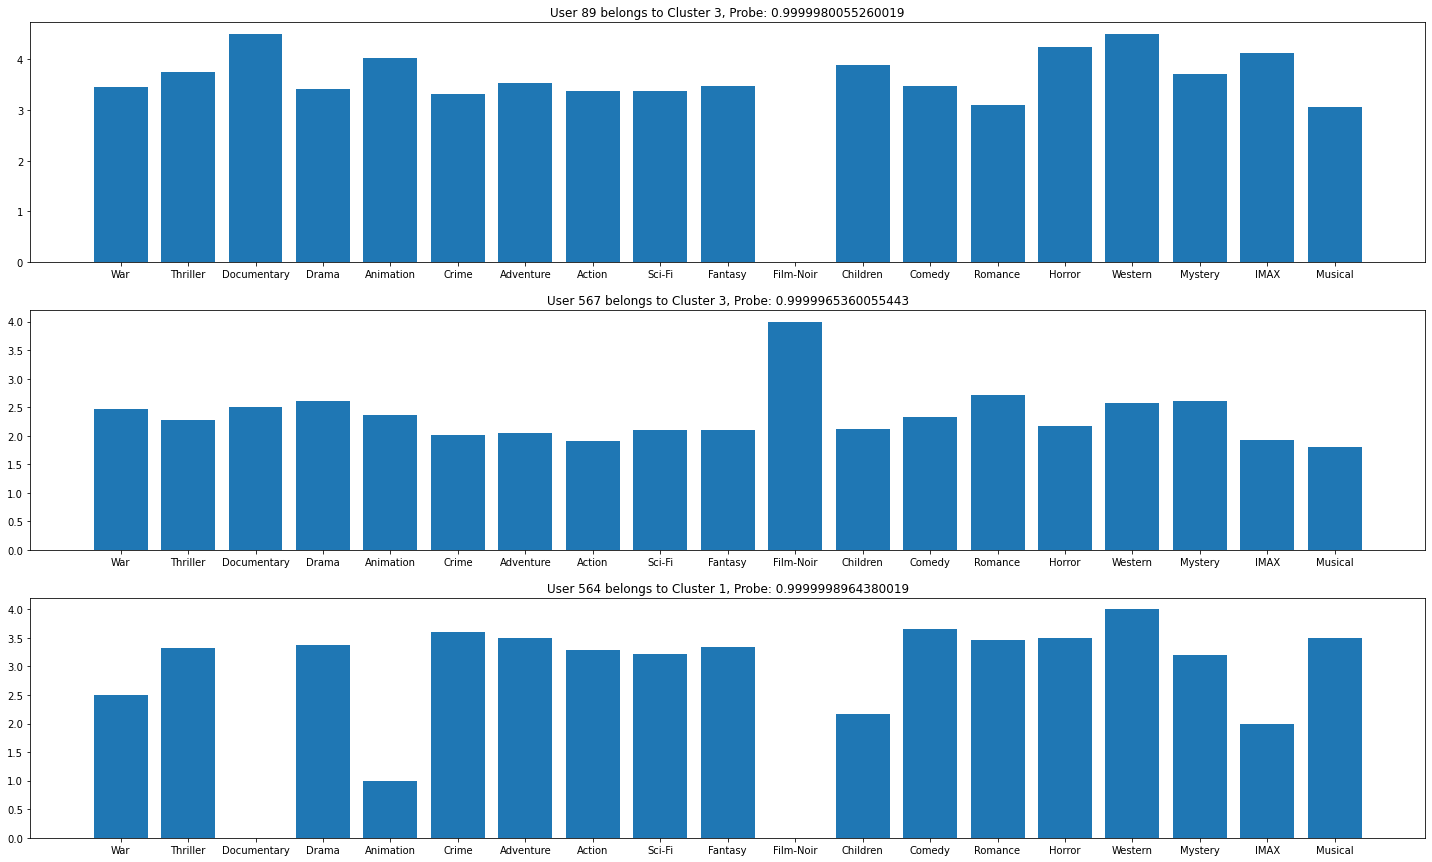

In [281]:
plot_users([89, 567, 564])